In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

df

,num_pregnant,glucose_concentration,blood_pressure,triceps_thickness,two_hour_insulin,bmi,pedigree_function,age,is_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from sklearn.model_selection import train_test_split
# define X and y
X = df.drop('is_diabetes', axis=1)
y = df['is_diabetes']
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_train

,num_pregnant,glucose_concentration,blood_pressure,triceps_thickness,two_hour_insulin,bmi,pedigree_function,age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [6]:
X_test

,num_pregnant,glucose_concentration,blood_pressure,triceps_thickness,two_hour_insulin,bmi,pedigree_function,age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

recall = recall_score(y_test, y_pred)

print(f'recall: {recall}')


recall: 0.6625


In [10]:
# Tentukan parameter yang akan diuji
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


In [11]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [13]:
y_pred = gs.predict(X_test)

In [14]:
recall = recall_score(y_test, y_pred, average='binary')

print(f'recall: {recall}')

recall: 0.6625


In [ ]:
# Tampilkan hasil terbaik
print(f"Best Hyperparameters: {gs.best_params_}")
print(f"Best Cross-validation Score: {gs.best_score_:.4f}")


In [18]:


importances = rf.feature_importances_

# Create a DataFrame to show the feature names and their importance
feature_names = X_train.feature_names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [20]:
best_rf = gs.best_estimator_

# Get the feature importances
importances = best_rf.feature_importances_

# Create a DataFrame to show the feature names and their importance
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                 Feature  Importance
1  glucose_concentration    0.282089
5                    bmi    0.158120
7                    age    0.142116
6      pedigree_function    0.113127
2         blood_pressure    0.084052
0           num_pregnant    0.080552
3      triceps_thickness    0.070559
4       two_hour_insulin    0.069385


In [27]:
df2 = pd.read_csv('Marketing_Campaign_Data_A-21492758-f47a-4913-971e-68c9a721311a.csv')



,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,APPL_DATETIME,DATE_BIRTH
0,58785,0,Cash loans,F,Y,Y,157500.0,225000.0,11781.0,225000.0,Secondary / secondary special,House / apartment,0.014520,2,2016-06-11 17:28:54,17-07-1959
1,166116,0,Cash loans,F,N,Y,180000.0,508495.5,21672.0,454500.0,Secondary / secondary special,House / apartment,0.031329,2,2015-05-22 08:42:03,23-06-1951
2,170111,0,Cash loans,F,Y,Y,360000.0,639396.0,47934.0,571500.0,Incomplete higher,House / apartment,0.032561,1,2016-11-26 20:54:07,07-06-1979
3,184247,0,Cash loans,F,N,Y,162000.0,254700.0,14751.0,225000.0,Higher education,House / apartment,0.010147,2,2017-02-20 09:22:06,20-07-1958
4,75886,0,Cash loans,M,Y,Y,225000.0,787131.0,42066.0,679500.0,Higher education,House / apartment,0.025164,2,2017-02-28 09:38:45,05-08-1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30717,183150,1,Cash loans,F,N,N,112500.0,275040.0,12951.0,180000.0,Secondary / secondary special,House / apartment,0.018801,2,2017-09-23 20:23:31,06-02-1953
30718,192611,0,Cash loans,F,N,N,112500.0,553500.0,17851.5,553500.0,Secondary / secondary special,House / apartment,0.018850,2,2018-01-08 22:57:45,14-06-1984
30719,50975,0,Cash loans,F,Y,N,225000.0,254700.0,24939.0,225000.0,Secondary / secondary special,House / apartment,0.006008,2,2018-04-29 16:14:04,09-10-1980
30720,71489,0,Cash loans,F,N,Y,315000.0,1762110.0,46480.5,1575000.0,Secondary / secondary special,House / apartment,0.072508,1,2017-11-05 03:03:21,13-12-1964


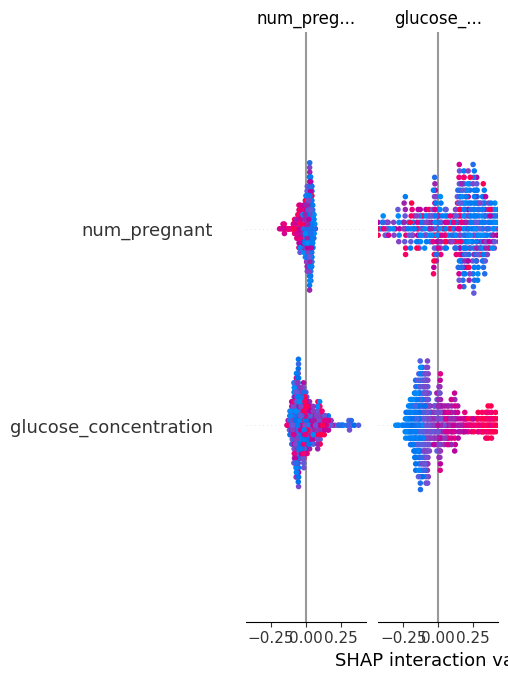

ValueError: All arrays must be of the same length

In [26]:
import shap
import numpy as np

explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Feature importance for the positive class in binary classification
shap.summary_plot(shap_values, X_train)

# If you want a bar plot (feature importance sorted by mean absolute SHAP value)
# shap.summary_plot(shap_values[0], X_train, plot_type="bar")

shap_values_for_class = shap_values[1]

# Compute the mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values_for_class).mean(axis=0)

# Create a DataFrame with feature names and their corresponding mean absolute SHAP values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean Abs SHAP': mean_abs_shap
})

# Sort the features by their mean absolute SHAP values in ascending order (least influential first)
sorted_feature_importance = feature_importance_df.sort_values(by='Mean Abs SHAP', ascending=True)

# Display the two least influential features
print("Two least influential features:")
print(sorted_feature_importance.head(2))